# Are Americans Losing Their Faith?

### By Korrenti Mayweather

Since the pre-modern era, human beings have pondered our existentence and reflected on our place in the Universe.  We began expressing our sense of purpose through the belief that there must be some intelligence greater than ourselves responsible for our existence and began dedicating our lives to please these entities, deifying them.  With the prevalence of the internet and thus information being more readily available in developed countries like the United States, there is a sense that the glamor of faith is beginning to lose its luster.  

So, are Americans losing their faith?  To explore this question, we must first define Faith.  For this, we'll defer to the Oxford dictionary's definition of faith - "Strong belief in the doctrines of a religion, based on spiritual conviction rather than proof".  Since the most prominent religion in the United States, Christianity, was formed around the idea of the existence of a deity, we'll extend our definition of faith to include a belief in a deity (namely, the Christian God) as well.  Now that we have faith defined, we will seek an answer to three questions:  

1. What does it mean to lose faith?

2. What factors can be said to contribute to the loss of faith?

3. Of those factors that contribute to a loss of faith, which has had the greatest effect?

## What does it mean to lose faith?

To answer our first question, since the act of having faith was built on the foundation of belief, we can justify the idea of losing faith to mean that one no longer believes in one's religion and, perhaps more importantly, it's deity.  However, since we are dealing with a change in culture over time, its important to note that faith can not only be lost on an individual basis, but also from generation to genration.   

## Our Data

For our exploration toward answering these questions, we'll use three datasets: the World Religion Dataset from ARDA (the Association of Religion Data Archiives) that spans 13 waves from 1945 to 2010, the 2014 U.S. Internet Use Survey by the U.S. Census Bureau, and the 2014 Religious Landscape Study dataset from the Pew Research Center.  Let's start with a histogram of our first dataset to assess whether our data is normally distributed, meaning, 67% of our data falls within one standard deviation of the mean.  We do this by using the probability density function for a normally distributed variable:

\begin{equation}
f(x|\mu,\sigma^2)=\frac1{\sqrt{2\sigma^2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation} 

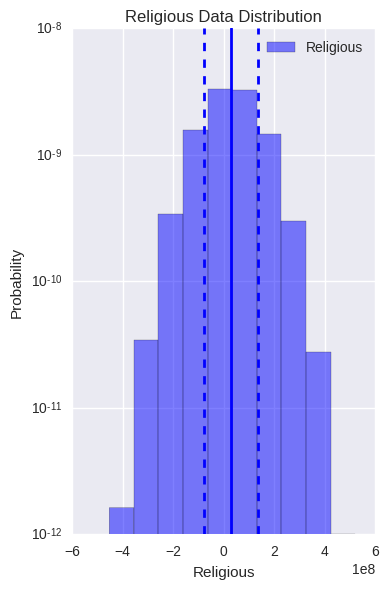

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

# Loading our Dataset into a Dataframe
df = pd.read_csv('World-Religion-Dataset-National-Religion-Dataset.csv', thousands=',')

plt.figure(figsize=(4,6))

mu_2 = 30142342.894 # mean of distribution (religious)
sigma_2 = 106861016.631 # standard deviation of distribution (religious)
j = mu_2 + sigma_2 * np.random.randn(1000000)


norm = j

plt.axvline(norm.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(norm.mean()-norm.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(norm.mean()+norm.std(), color='b', linestyle='dashed', linewidth=2)

sumrelig = plt.hist(j, normed=True, color='blue', label='Religious', alpha=.5)
plt.legend()

plt.ylabel('Probability')
plt.xlabel('Religious')
plt.title('Religious Data Distribution')

plt.yscale('log')

plt.tight_layout()
plt.show()

Looks like our data is normally distributed.  Let's dive in!

It is worth noting that exploring the changes in adherents of every religion in the United States would be exaustive but counter-productive to arriving at a meaningful conclusion to our question.  The gist here is, what is happening with most Americans in the U.S. and religion?  With this in mind, I have decided to look at how the number of people identifying as Christian in the United States has changed over the years given its dominance amongst American religious belief.

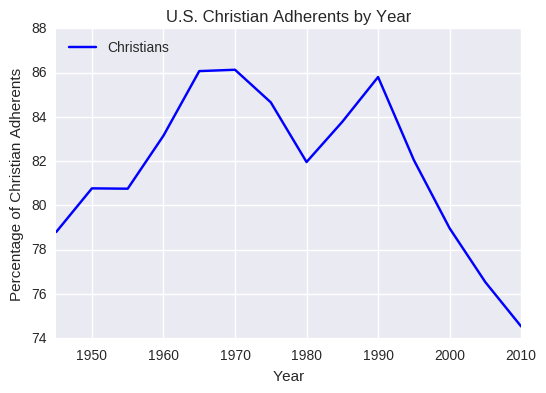

In [2]:
# Slicing portions of the data we want to work with and assigning them to variables
christian = df['CHRSGEN'][0:14]
pop = df['POP'][0:14]
year = df['YEAR'][0:14]

# Normalizing for population
crp_norm = (christian / pop) * 100

# Plotting our data
christ, = plt.plot(year, crp_norm, color='blue', label = 'Christians')
plt.xlabel('Year')
plt.ylabel('Percentage of Christian Adherents')
plt.title('U.S. Christian Adherents by Year')
plt.legend(loc = 'upper left', handles=[christ])
plt.xlim([1945, 2010])

plt.show()

As you can see, there is more than an 11 percent drop in Christian adherents between 1990 and 2010 when normalized for the U.S. population. What is happening here?  Let's add to our graph the trend of those identifying as non-religious over the same period. 

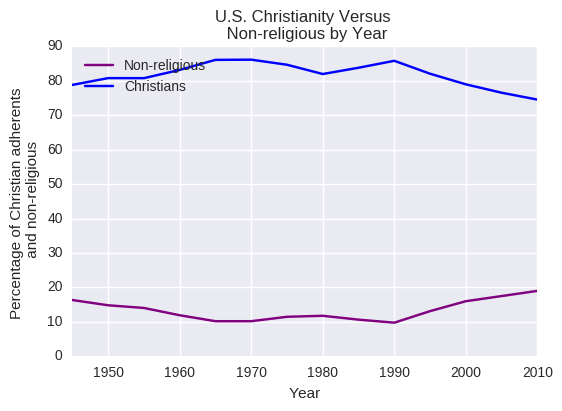

In [3]:
nonrelig = df['NONRELIG'][0:14]

nrp_norm = (nonrelig / pop) * 100

nonrel, = plt.plot(year, nrp_norm, color='purple', label = 'Non-religious')
christ, = plt.plot(year, crp_norm, color='blue', label = 'Christians')

plt.xlabel('Year')
plt.ylabel('Percentage of Christian adherents \n and non-religious')
plt.title('U.S. Christianity Versus \n Non-religious by Year')
plt.legend(loc = 'upper left', handles=[nonrel, christ])
plt.xlim([1945, 2010])

plt.show()

Wow!  We see the inverse of the Christian trend with those saying they are non-religious and it takes a huge turn beginning in 1990 to the tune of 9 percent over the next 10 years.  Clearly, Americans in the U.S. are losing their faith, but why?

## What is causing the loss of faith in America?

Now, before we get into the significance of the 90's as they relate to these trends in religion, I figured we should explore our second question to see how the data changes across demographics like access to the internet, income, education, birth generation, race, gender, and geographic region.  Here, we'll take the meaning of losing faith a bit further with the introduction of the label atheist, a greek word literally meaning "without god" with a colloquial understanding of "without belief in any gods".  We'll see if we can find any significant correlation with the rapid loss of faith in the 90's.  Let's start with how atheism is distributed across generations using data from a 2014 study of the religious landscape in the U.S. by the Pew Research Center.

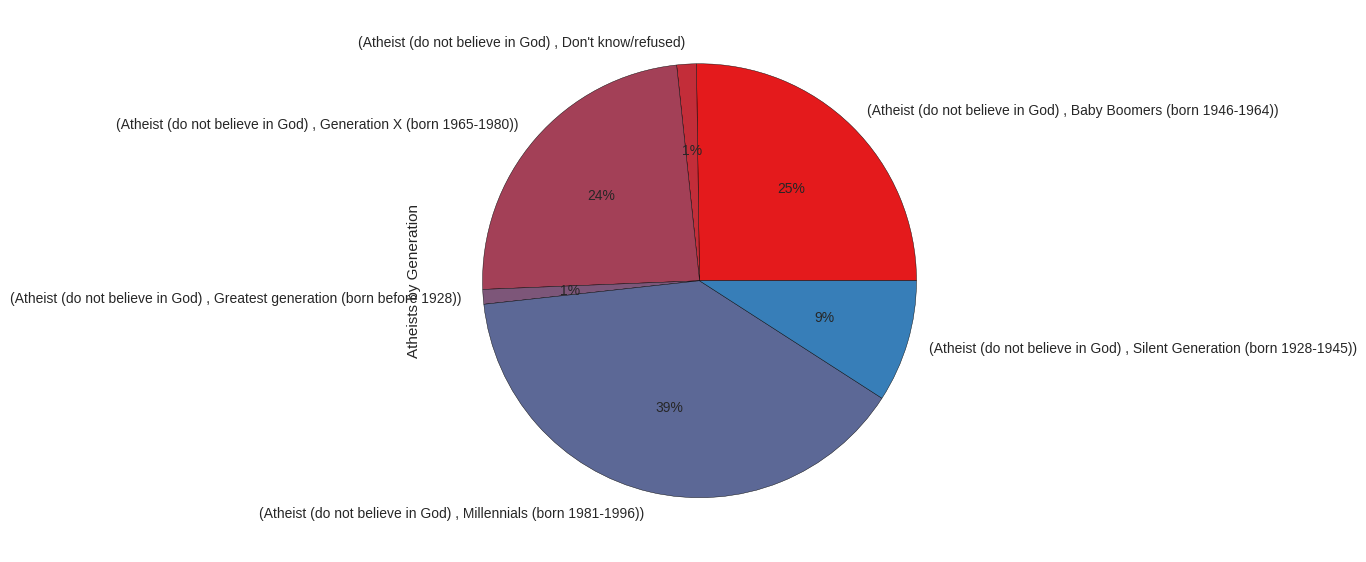

In [4]:
df_rls = pd.read_csv('2014-religious-landscape-study.csv', thousands=',', low_memory=False)
rel_gnrtn = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'Respondent\'s generational cohort_labels'])['Respondent\'s generational cohort_labels'].count()

atheist_gnrtn = rel_gnrtn[13:19]
# atheist_gnrtn_mean = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'Respondent\'s generational cohort_labels'])['Respondent\'s generational cohort_labels'].count().var()
christ_gnrtn = rel_gnrtn[45:52]
# print(atheist_gnrtn_mean ** .5)
cs=cm.Set1(np.arange(40)/40.)
atheist_gnrtn.plot(kind='pie', figsize=(7,7), label='Atheists by Generation', colors=cs, autopct='%1.0f%%')
plt.show()

Here, we can see a steady loss of faith over generations but something significant is happening when we look at the amount of atheist millennials.  Atheism amongst millennials has grown by 162.5% over Generation X.  Why has there been so much growth in atheism during this time?  

My theory is that the Internet, the most significant human advancement during this period, may have something to do with it.  So far, this data is converging nicely with our graph showing the inverse change between Christians and the non-religious during the 90's.  Let's see how the relationship with the non-religious stacks up agaisnt the growing trend of households with Internet in the U.S.

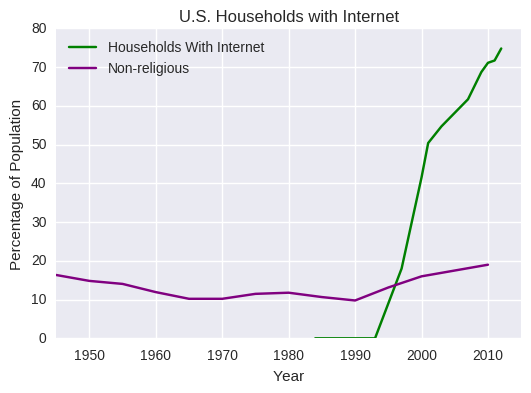

In [5]:
df3 = pd.read_csv('Internet_Use_USA_cor.csv', thousands=',')[8:20][::-1]

year2 = df3['YEAR'].astype('int')
tot = df3['TOTAL_NUM'].astype('int')
percom = df3['PER_COM'].astype('float')
pernet = df3['PER_NET'].astype('float')

net_by_year, = plt.plot(year2, pernet, color='green', label = 'Households With Internet')
nonrel, = plt.plot(year, nrp_norm, color='purple', label = 'Non-religious')

plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.title('U.S. Households with Internet')
plt.legend(loc='upper left', handles=[net_by_year, nonrel])
plt.xlim([1945, 2015])
plt.show()

Although we don't have data for households with internet before 1993, it is interesting to note that as more households became connected to the net, more people began reporting that they were non-religious.  The amount of people reporting to be non-religious has increased 150% since reports of households being connected to the Internet began.  

Perhaps as more information becomes readily available, more people begin to question the foundations of their religious beliefs.  However, despite any particular source of information, what could cause people to be critical of their religious beliefs?  As critical thinking skills generally become more refined with education, let's take a look at how Christians and Atheists fare when it comes to education. 

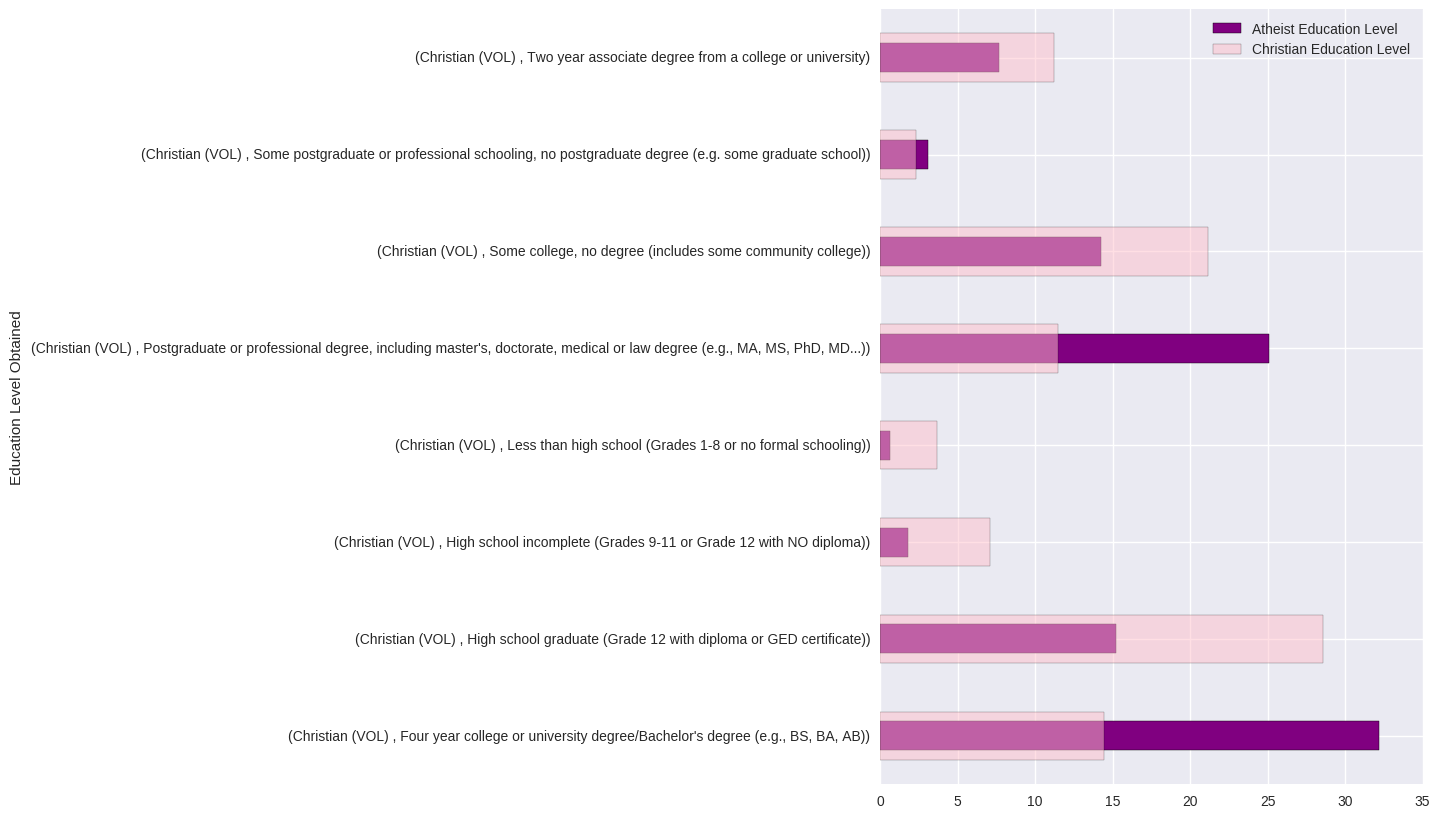

In [6]:
rel_educ = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'EDUC. What is the highest level of school you have completed or the highest degree you have received? _labels'])['Which of the following describes your race?_labels'].count()
atheist_educ = rel_educ[18:26] / rel_educ[18:26].sum() * 100
christ_educ= rel_educ[44:52] / rel_educ[44:52].sum() * 100

w = 0.3
atheist_educ.plot(kind='barh', width = w, figsize=(7,10), color='purple', label='Atheist Education Level')
christ_educ.plot(kind='barh', figsize=(7,10), color='pink', alpha=.5, label='Christian Education Level' )
plt.legend(loc='upper right')
plt.ylabel('Education Level Obtained')

plt.show()

Based on the data, it seems more Atheists tend to have graduate and postgraduate level degrees and more Christians tend to have only high school diplomas.  It is definitely interesting to see that the higher the education, the more likely one is to be an Atheist.

Let's see what happens when we juxtapose Atheists and Christians with income.

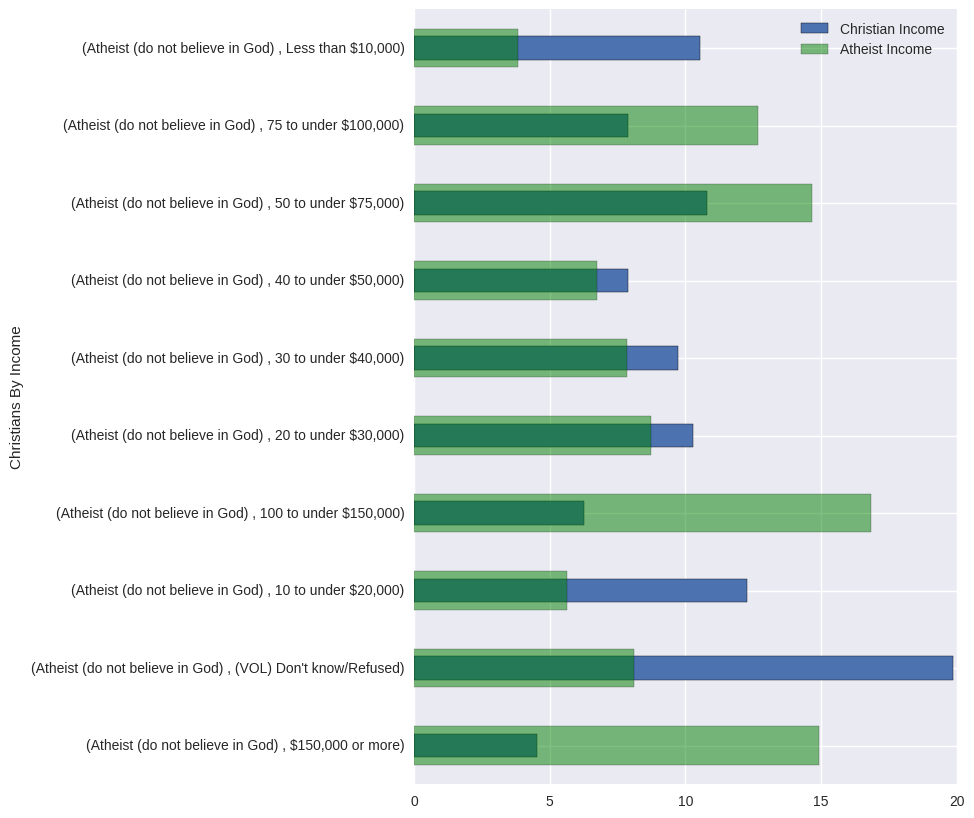

In [7]:
rel_income = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'INCOME. Last year, that is in 2013, what was your total family income from all sources, before taxes? Just stop me when _labels'])['EDUC. What is the highest level of school you have completed or the highest degree you have received? _labels'].count()
atheist_income = rel_income[19:29] / rel_income[19:29].sum() * 100
christ_income = rel_income[47:57] / rel_income[47:57].sum() * 100

w = 0.3
christ_income.plot(kind='barh',width=w, figsize=[7, 10], label="Christian Income")
atheist_income.plot(kind='barh', figsize=[7, 10], color='g', alpha=.5, label="Atheist Income")

plt.legend(loc='upper right')
plt.ylabel('Christians By Income')
plt.show()

Its no surprise Atheists generally tend to earn more than Christians given that earning potential increases with education, but could it be that Christians are losing their faith as they become more educated and thus more financially independent? Let's take a look at a few other potential contributors to Christians losing faith like race, gender, the state lived in, and political affiliation.

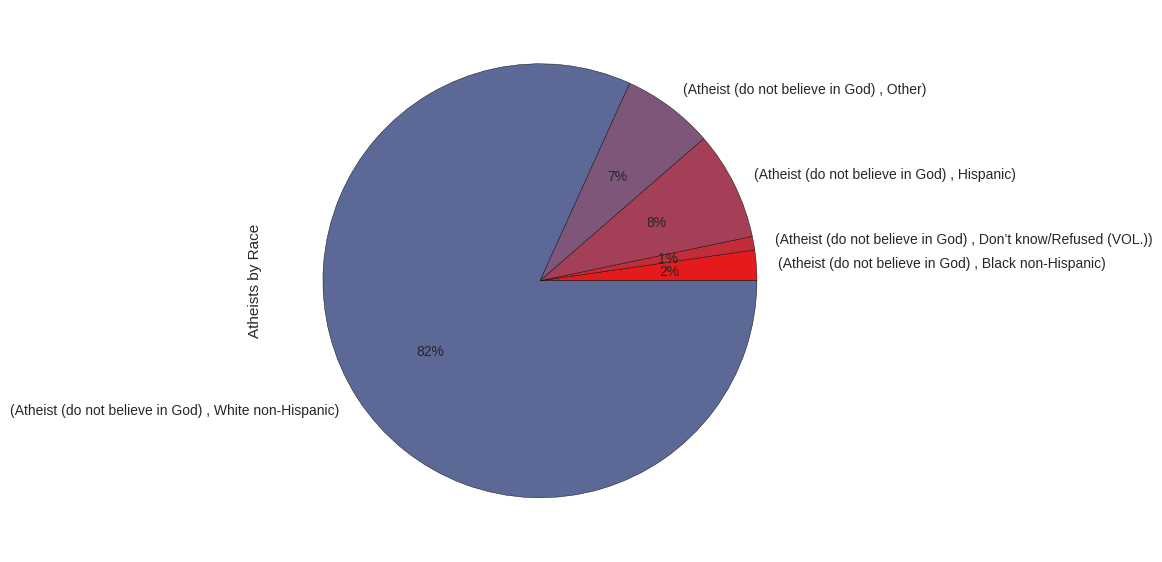

In [8]:
rel_race = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'Race-Ethnicity_labels'])['Race-Ethnicity_labels'].count()
atheist_race = rel_race[10:15]
christ_race = rel_race[45:52]

cs=cm.Set1(np.arange(40)/40.)
atheist_race.plot(kind='pie', figsize=(7,7), label='Atheists by Race', colors=cs, autopct='%1.0f%%')
plt.show()

Its not surprising that most of the faithless Americans are White given they make up 63% of the U.S. population.  With more data, we could see if the changing social dynamics between races like more integration or cultural tolerance may have impacted the rate of chage in religious status.

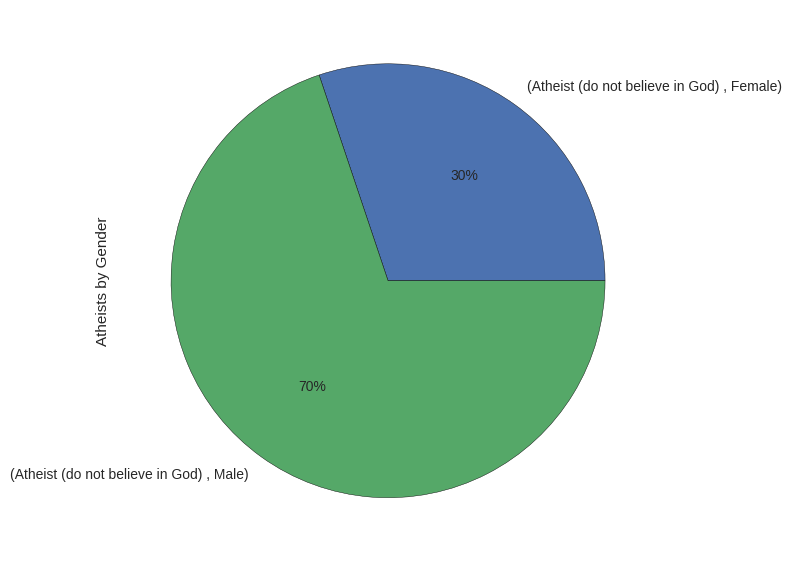

In [9]:
rel_gen = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'Respondent\'s sex. Based on respondent\'s self-report, unless the respondent declined to answer the question or indicated _labels'])['Respondent\'s sex. Based on respondent\'s self-report, unless the respondent declined to answer the question or indicated _labels'].count()
atheist_gen = rel_gen[8:10]
christ_gen = rel_gen[45:52]

atheist_gen.plot(kind='pie', figsize=(7,7), label='Atheists by Gender', autopct='%1.0f%%')
plt.show()

As you can see, more males have a lack of faith than females.  It would be great if we had more data to see the percentage of men and women who have reported to be faithless over time.  I hope to seek more datasets in the future to see if we can find any reasonable correlations with this. 

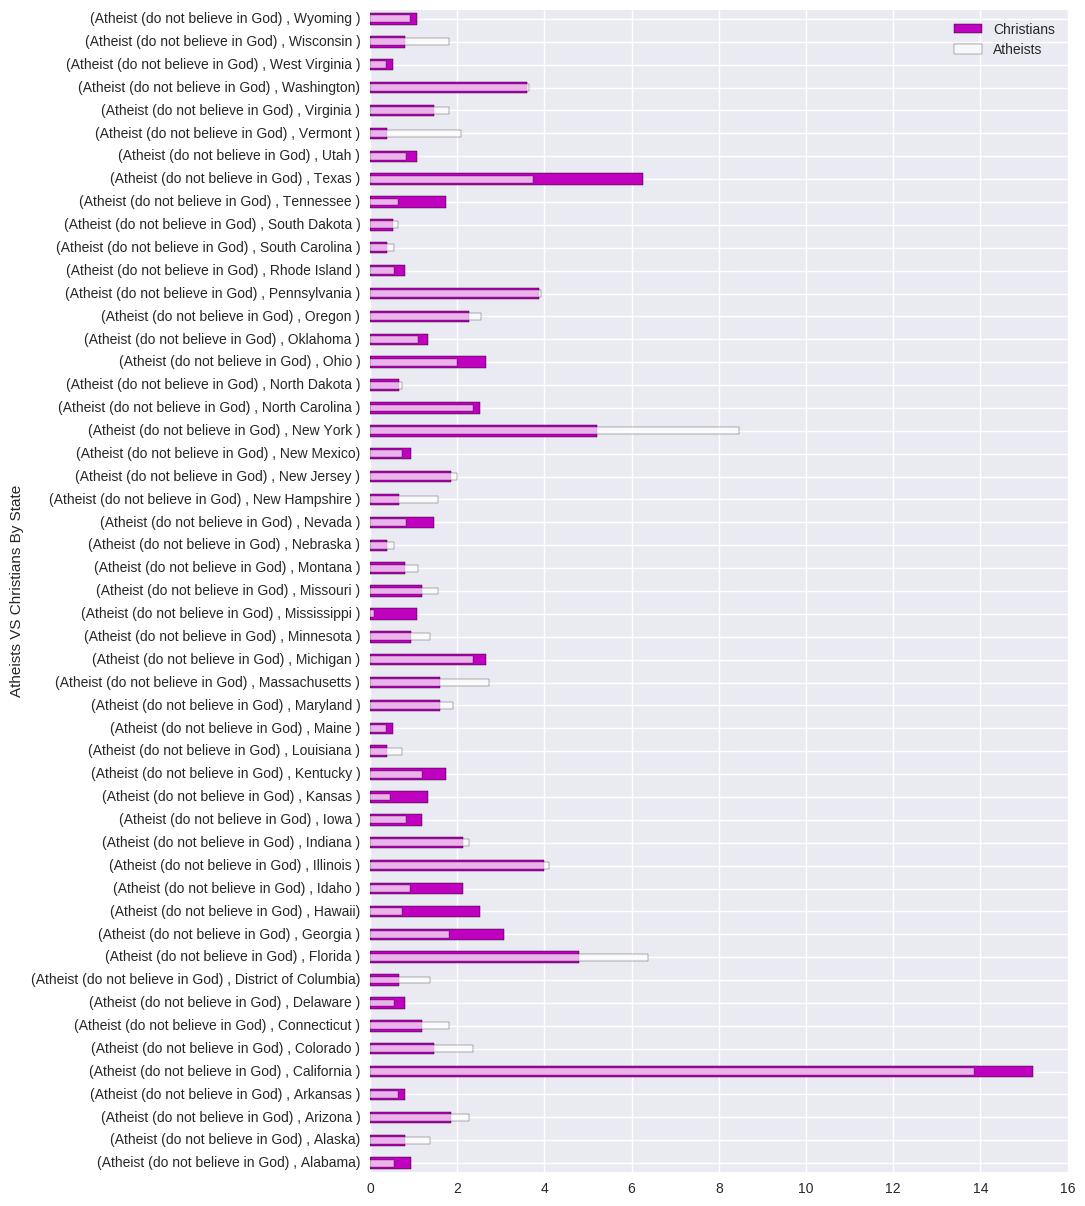

In [10]:
reli = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'State based on self-reported zipcode_labels'])['EDUC. What is the highest level of school you have completed or the highest degree you have received? '].count()
atheism_by_state = reli[61:112] / reli[61:112].sum() * 100
christ_by_state = reli[173:224] / reli[173:224].sum() * 100
christ_state = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'State based on self-reported zipcode_labels'])['EDUC. What is the highest level of school you have completed or the highest degree you have received? ']

w = 0.3
christ_by_state.plot(kind='barh', figsize=[9,15], color='m', label='Christians')
atheism_by_state.plot(kind='barh', width=w, figsize=[9,15], color='w', alpha=.7, label='Atheists')

plt.ylabel('Atheists VS Christians By State')
plt.legend(loc='upper right')
plt.show()

Here, we see some states have a higher percentage of Atheists than others like California, New York, and Florida.  However, there is no way to ascertain whether there is a  correlation between growing up in certain states and Americans losing their faith without data showing the changes of Atheists and Christians per state over time.  So, to draw any reasonable conclusions here, we will need more data.  Next, we'll take a look a Atheism as it relates to political affiliation.

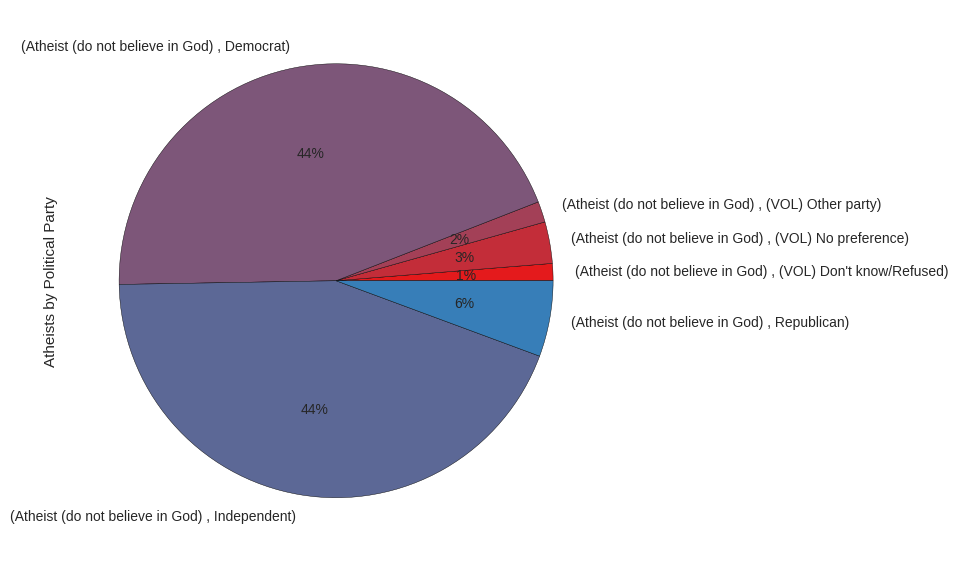

In [11]:
rel_pol_party = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'PARTY. In politics TODAY, do you consider yourself a Republican, Democrat, or Independent?_labels'])['PARTY. In politics TODAY, do you consider yourself a Republican, Democrat, or Independent?_labels'].count()
atheist_pol_party = rel_pol_party[12:18]
christ_pol_party = rel_pol_party[45:52]

cs=cm.Set1(np.arange(40)/40.)
atheist_pol_party.plot(kind='pie', figsize=(7,7), label='Atheists by Political Party', colors=cs, autopct='%1.0f%%')
plt.show()

Although its interesting to see that Atheists are split to either being Democrat or Independent.  This does not provide any valuable insight into whether political affiliation has any effect on Americans losing their faith. 

## What caused Americans to lose their faith the most?

It seems we can reasonably conclude that the Internet, education, and the generation one is born in have a strong correlation with the drop in Christian faith in the U.S., but which affects the faith of Americans most?  The most significant corellation seems to be the Internet but it would be nice to weight each according to the probability of their impact on Americans losing faith.  

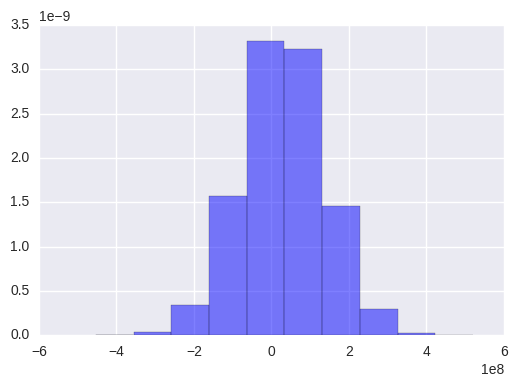

In [12]:
sumrelig = plt.hist(j, normed=True, color='blue', label='Religious', alpha=.5)
